<a href="https://colab.research.google.com/github/choinkyo/Projects/blob/master/Linear%20Regression%20%26%20K-Nearest%20Neighbors(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regeression & K-Nearest Neighbors(KNN)


## Part I: Linear Regression

In [0]:
# import pandas using the conventional abbreviation
import numpy as np
import pandas as pd

### Import Data

We can import structured data from many sources

1) Import from URL

or 2) Import locally 

or 3) Import from Google Drive

In [0]:
# import the data from an online resource
ToyotaCorolla = pd.read_csv('https://www.biz.uiowa.edu/faculty/jledolter/datamining/ToyotaCorolla.csv')
# import locally 
# pd.read_csv('/Users/xiyuange/Downloads/ToyotaCorolla.csv')

 
### Prediction on the sale price of a used automobile. 

 
 Source: Ledolter (2013) Data Mingin and Business Analytics with R

 Description: The data set includes sale prices and vehicle characteristics 
 of 1436 used Toyota Corollas.
 


 Price: Offer price in EUROs
 
 Age: Age in months as in August 2004
 
 KM: Accumulated kilometers on odometer
 
 FuelType: Fuel type (petrol, diesel, CNG)
 
 HP: Horsepower
 
 MetColor: Metallic color (Yes=1, No=0)
 
 Automatic: Automatic (Yes=1, No=0)
 
 CC: Cylinder volume in cubic centimeters
 
 Doors: Doors Number of doors
 
 Weight: Weight in kilograms

### Linear Regression

We start with a linear model

1) Specify the formula and data

2) regress and output the result

In [15]:
import statsmodels.formula.api as sm

result = sm.ols(formula="Price ~ Age+KM+HP+MetColor+Automatic+CC", data=ToyotaCorolla).fit()

print(result.summary())
# estimate and examine the linear model here

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1104.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        00:20:15   Log-Likelihood:                -12565.
No. Observations:                1436   AIC:                         2.514e+04
Df Residuals:                    1429   BIC:                         2.518e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.334e+04    482.164     27.673      0.0

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,logKM,logCC
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,10.757605,7.600902
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,11.197351,7.600902
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,10.638520,7.600902
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,10.778956,7.600902
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,10.558414,7.600902


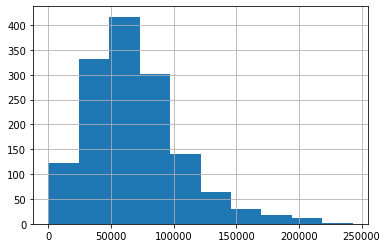

In [16]:
# use log transformation on KM and CC, estimate the model once again
ToyotaCorolla.KM.hist()
ToyotaCorolla['logKM'] = np.log(ToyotaCorolla['KM'])
ToyotaCorolla['logCC'] = np.log(ToyotaCorolla['CC'])
ToyotaCorolla.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,logKM,logCC
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,10.757605,7.600902
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,11.197351,7.600902
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,10.638520,7.600902
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,10.778956,7.600902
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,10.558414,7.600902


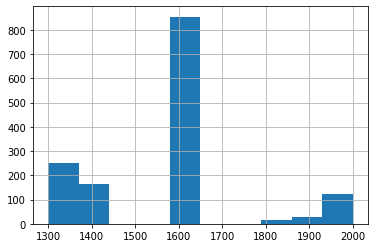

In [17]:
# use log transformation on KM and CC, estimate the model once again
ToyotaCorolla.CC.hist()
ToyotaCorolla['logKM'] = np.log(ToyotaCorolla['KM'])
ToyotaCorolla['logCC'] = np.log(ToyotaCorolla['CC'])
ToyotaCorolla.head()

## Part II: K-Nearest Neighbors (KNN)



### Construct train and test sets

In [0]:
# set random seed for reproducibility
np.random.seed(1) 

In [0]:
# construct the independent variables (X) and dependent variable (y)
X= ToyotaCorolla.drop('Price', axis=1)
X=ToyotaCorolla[['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC']]
Y=ToyotaCorolla.Price

In [0]:
# split the train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

### Alternatively without sklearn

### Scale the data to avoid bias

In [0]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_knn= scaler.transform(X_train)
X_test_knn = scaler.transform(X_test)

### Train the model

In [41]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
rmse_val = []
for K in range (10) :
  K = K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K) 
  model.fit(X_train_knn, y_train)
  pred = model.predict(X_test_knn)
  error=np.sqrt(mean_squared_error(y_test, pred))
  rmse_val.append(error)
  print('RMSE value for k=' , K, 'is:', error)
# try one specific k value first, then try to embed it in a loop

RMSE value for k= 1 is: 5117.239536673503
RMSE value for k= 2 is: 4613.1382557690895
RMSE value for k= 3 is: 4462.614022214495
RMSE value for k= 4 is: 4360.258171415721
RMSE value for k= 5 is: 4306.800816231747
RMSE value for k= 6 is: 4298.081760195184
RMSE value for k= 7 is: 4288.133050321111
RMSE value for k= 8 is: 4216.719932204846
RMSE value for k= 9 is: 4191.530844294581
RMSE value for k= 10 is: 4135.207141656839


#### Compare with linear regression model

In [46]:
# estimate a linear model with the same train set (why has it to be the same?)
lm_train_data = pd.merge(X_train, Y_train, how = 'left', left_index = True, right_index = True)

# calculate rmse on the same test set (again, why?)
lm2 = sm.ols(formula="Price ~ Age+KM+HP+MetColor+Automatic+CC", data = lm_train_data).fit()
ypred = lm2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,ypred)))

5165.870115737739
